<a href="https://colab.research.google.com/github/Rino04/Moringa_week_9_IP/blob/main/Titanic_Data_KNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

### a) Specifying the Question

> Use the Titanic dataset to make prediction using K-nearest neighbor classifier and evaluate the metricts.


### b) Defining the Metric for Success

> The metric of success is if we can build a K-NN classifier that can give a good accuracy in classifying who survived or died on the Titanic.

### c) Understanding the context 

The Titanic, during her maiden voyage on April 15, 1912, sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. The tragedy is considered one of the most infamous shipwrecks in history and led to better safety guidelines for ships. We shall use the data provided to  analyse wheteher passengers on board survived or not.

The columns in our datasets are explained below:

PassengerId: unique ID of the passenger

Survived: 0 = No, 1 = Yes

Pclass: passenger class 1 = 1st, 2 = 2nd, 3 = 3rd

Name: name of the passenger

Sex: passenger’s sex

Age: passenger’s age

SibSp: number of siblings or spouses on the ship

Parch: number of parents or children on the ship

Ticket: Ticket ID

Fare: the amount paid for the ticket

Cabin: cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### d) Recording the Experimental Design

The following steps will be followed in conducting this analysis:
1. Defining the Question
2. Reading the Data.
3. Data Exploration.
4. Data Cleaning
5. Data Analysis
6. Prediction Models
7. Evaluation of the solution
8. Challenging the solution
9. Conclusion

### e) Data Relevance

The data is relevant as it will help in prediction of whether a passenger survived or not. 

# Data Exploration

### Importing the libraries

In [ ]:
#For data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder as Le

#for metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#warnings
import warnings
warnings.filterwarnings('ignore') 

### Loading and prievew the datasets

In [ ]:
# Loading the train dataset
train=pd.read_csv('/content/train (5).csv')

In [ ]:
#Loading the test dataset
test=pd.read_csv('/content/test (1).csv')

In [ ]:
#check the info 
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [ ]:
#check the shape 
print('This train dataset has ' + str(train.shape[0]) + ' rows, and ' + str(train.shape[1]) + ' columns')
print('This test dataset has ' + str(test.shape[0]) + ' rows, and ' + str(test.shape[1]) + ' columns')

This train dataset has 891 rows, and 12 columns
This test dataset has 418 rows, and 11 columns


In [ ]:
#Preview the head of train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# preview the tail
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Preview the test head
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Preview the tail of test
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Data Cleaning

## Train Dataset

### Uniformity

In [ ]:
#We shall have the our column names written in pascal format
train.columns=train.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
#Lets check for unique values for each column
for col in list(train):
    print(col)
    print(train[col].unique())
    print("******")

passengerid
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

### Validity

In [ ]:
#Check for irrelevant columns and drop them
train.drop(['passengerid','ticket','cabin', 'fare','name','ticket'], axis=1, inplace=True)
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')

### Completeness

In [ ]:
#check for null values
print('This train dataset has ' + str(train.shape[0]) + ' rows, and ' + str(train.shape[1]) + ' columns')
train.isnull().sum()

This train dataset has 891 rows, and 7 columns


survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
dtype: int64

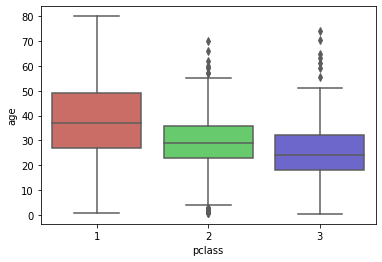

In [ ]:
# Imputing missing values
# ---
# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='pclass', y='age', data=train, palette='hls')

In [ ]:
#We shall impute the null values in age
# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    age = cols[0]
    pclass = cols[-1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
train['age'] = train[['age']].apply(age_approx, axis=1)
train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
dtype: int64

In [ ]:
#Now the null values are in embarked. We shall drop the 2 null values without losing any variable information
train.dropna(inplace=True)
train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

### Consistency 

In [ ]:
#we will look for the number of rows with duplicate records
print('Number of rows with duplicated values',train.duplicated().sum())

#we then drop the rows with duplicated records
train.drop_duplicates(inplace=True)
print('After dropping there are',train.duplicated().sum(), "Duplicated rows")

print('Shape of dataframe after dropping duplicated rows', train.shape)

Number of rows with duplicated values 315
After dropping there are 0 Duplicated rows
Shape of dataframe after dropping duplicated rows (574, 7)


### Outliers

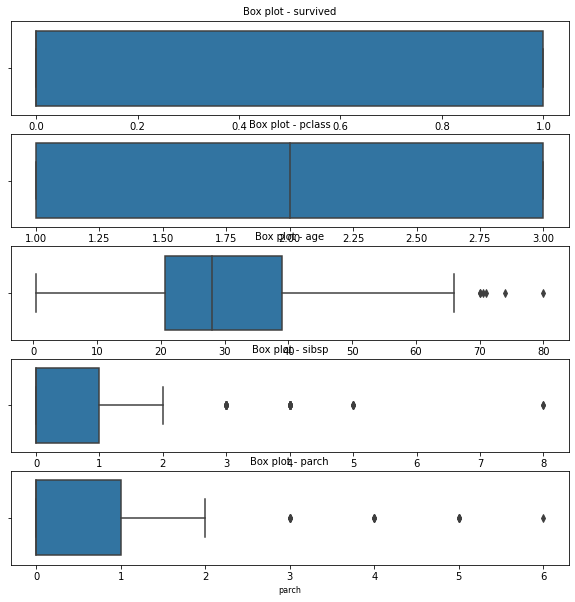

In [ ]:
#Selecting numerical columns
num_cols=train.select_dtypes(include=np.number).columns.tolist()

col_names=num_cols
fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()
#There are no outliers in age but there are outliers in sibsp and parch

## Test Dataset

### Uniformity

In [ ]:
#We shall have the our column names written in pascal format
test.columns=test.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
test.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
#Lets check for unique values for each column
for col in list(test):
    print(col)
    print(test[col].unique())
    print("******")

passengerid
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086

### Validity

In [ ]:
#Check for irrelevant columns and drop them
test.drop(['passengerid','ticket','cabin', 'fare', 'name','ticket'], axis=1, inplace=True)
test.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')

### Completeness

In [ ]:
#check for null values
print('This train dataset has ' + str(test.shape[0]) + ' rows, and ' + str(test.shape[1]) + ' columns')
test.isnull().sum()

This train dataset has 418 rows, and 6 columns


pclass       0
sex          0
age         86
sibsp        0
parch        0
embarked     0
dtype: int64

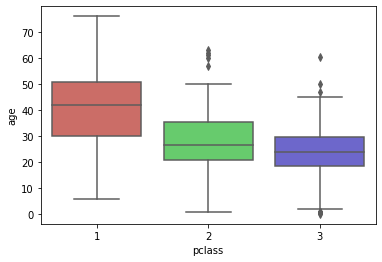

In [ ]:
# Imputing missing values
# ---
# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='pclass', y='age', data=test, palette='hls')

In [ ]:
#We shall impute the null values in age
# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    age = cols[0]
    pclass = cols[-1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
test['age'] = test[['age']].apply(age_approx, axis=1)
test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

### Consistency 

In [ ]:
#we will look for the number of rows with duplicate records
print('Number of rows with duplicated values',test.duplicated().sum())

#we then drop the rows with duplicated records
test.drop_duplicates(inplace=True)
print('After dropping there are',test.duplicated().sum(), "Duplicated rows")

print('Shape of dataframe after dropping duplicated rows', test.shape)

Number of rows with duplicated values 127
After dropping there are 0 Duplicated rows
Shape of dataframe after dropping duplicated rows (291, 6)


### Outliers

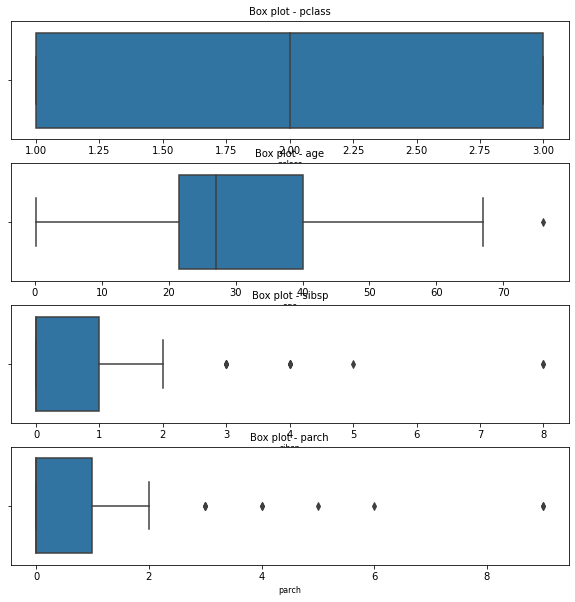

In [ ]:
#Selecting numerical columns
num_cols=test.select_dtypes(include=np.number).columns.tolist()

col_names=num_cols
fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(test[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()
#There are no outliers in age but there are outliers in sibsp and parch

# Exploratory Data Analysis

### Univarient Analysis

In [ ]:
#Get the statistical summaries
train.describe()

,survived,pclass,age,sibsp,parch
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,0.470383,2.170732,29.659268,0.675958,0.562718
std,0.499557,0.851309,15.160979,1.098729,0.933423
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.625000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86caa1e5d0>,
      dtype=object)

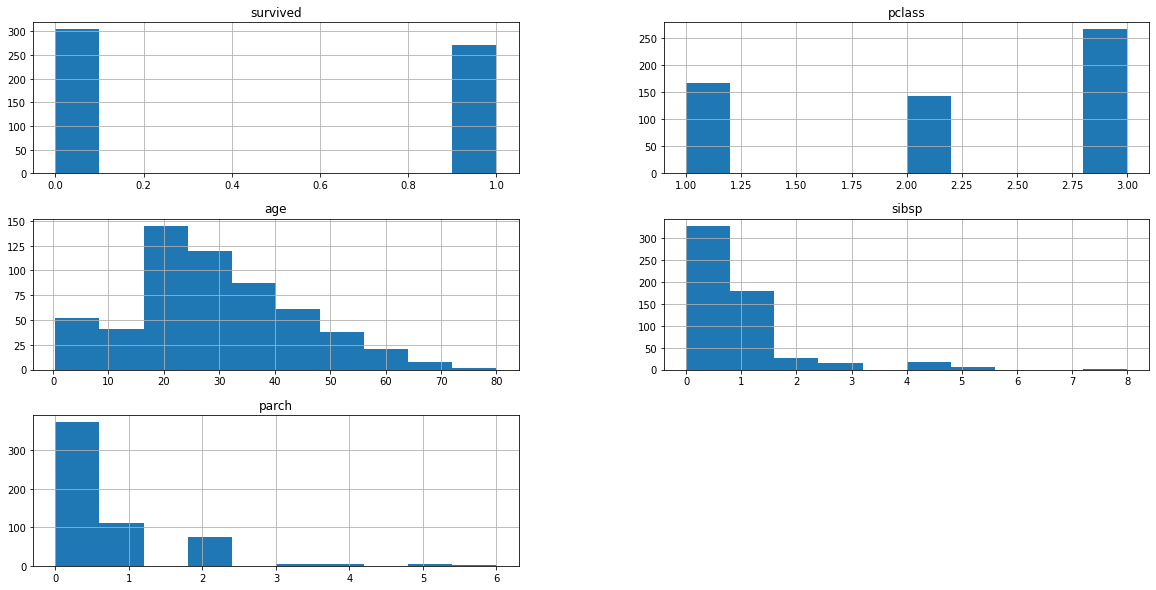

In [ ]:
#visulize the sistributions of the columns
train.hist(figsize = (20,10))

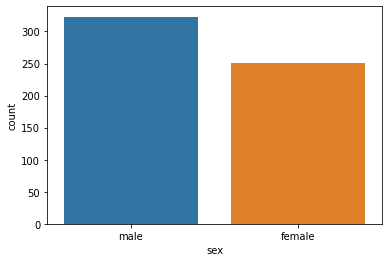

In [ ]:
#Visulize the distribution of gender in the boat
sns.countplot(x='sex', data=train)
#There were more men that female in the titanic boat.

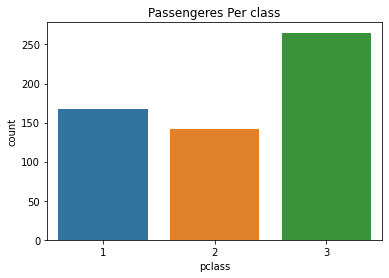

In [ ]:
#Count plots: Class
sns.countplot(x='pclass',data=train)
plt.title('Passengeres Per class')
plt.show()
#majority of the passengers were in 3rd class.
#There were more passngers in 1st class than 2nd class which is old as its much expensive.

Text(0.5, 1.0, 'Passengers who survived')

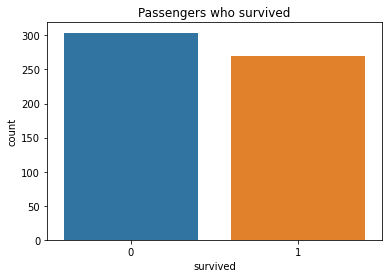

In [ ]:
#Lets visulize how many passangers survived
sns.countplot(x='survived',data=train)
plt.title('Passengers who survived')
#From the data 0 represents those who didn't survive while 1 represent those who did.
#Its evident that most of the passangers in the cruise ship titanic died when the ship sunk.

Text(0.5, 1.0, 'Gender Distribution of those who Survived')

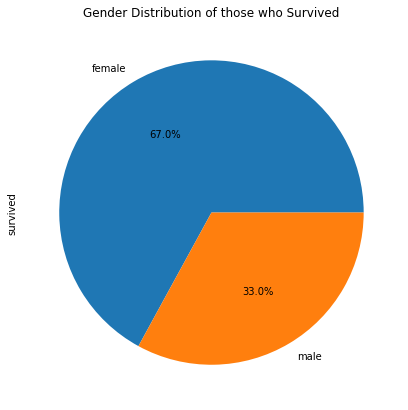

In [ ]:
#Visulize the gender distibution of those who survived
gender_survived = train.groupby('sex')['survived'].sum()
gender_survived.plot(kind= 'pie', figsize=[7,7], autopct = '%1.1f%%')
plt.title("Gender Distribution of those who Survived")
#Most of the people who survived were females (67.9%) while 32.1% of the survivers were men.

Text(0.5, 1.0, 'Passengers location of Embarking')

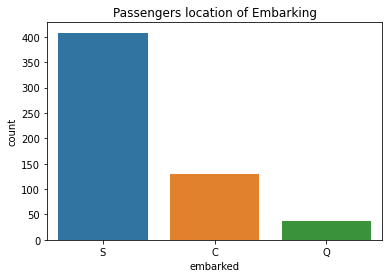

In [ ]:
#Lets visulize where the passngers were ended
sns.countplot(x='embarked',data=train)
plt.title('Passengers location of Embarking')
#Most of the passengers who boareded the cruise ship were ended to S (Southampton in England), while the rest were ended to C (Cherbourg in France) or Q (Queenstown in ireland)  

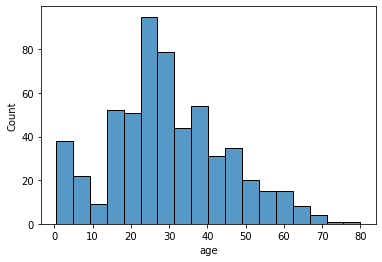

In [ ]:
#Visulize the age distribution of the passengers
sns.histplot(data=train, x="age")
#Most of the passangers on board were aged between 20 and 30 years.

### Bivarient Analysis

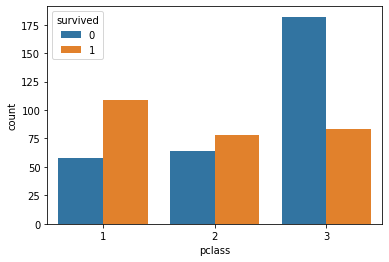

In [ ]:
# Visulize the survivers per class
sns.countplot(x='pclass',hue = "survived", data = train)
#Most of the passngers who survived were from first class with the most casualty being from 3rd class.
#In the 2nd class the number of survivers were equal to the number of casualty.

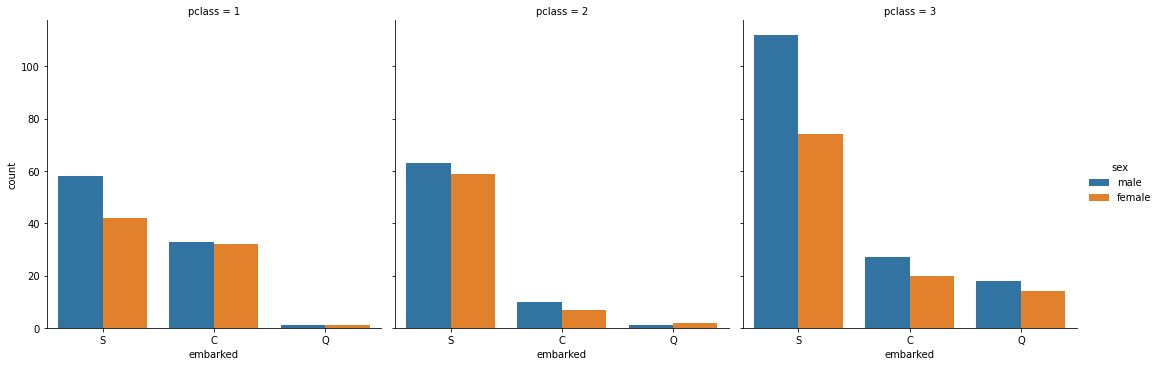

In [ ]:
# Countplot for Embarked Feature
sns.catplot(x ='embarked', hue ='sex',  
kind ='count', col ='pclass', data = train) 
# majority of passengers from all classes boarded from Southampton

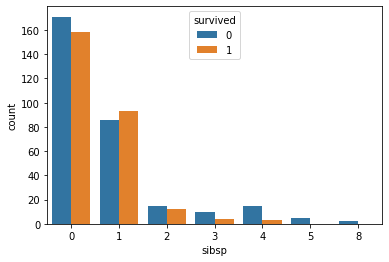

In [ ]:
#Visulize the age distribution of the passengers
sns.countplot(data=train, x="sibsp", hue='survived')
#Most of the passangers on board had no sibslings with them.
#those with only 1 sibling, were the majority to survive.

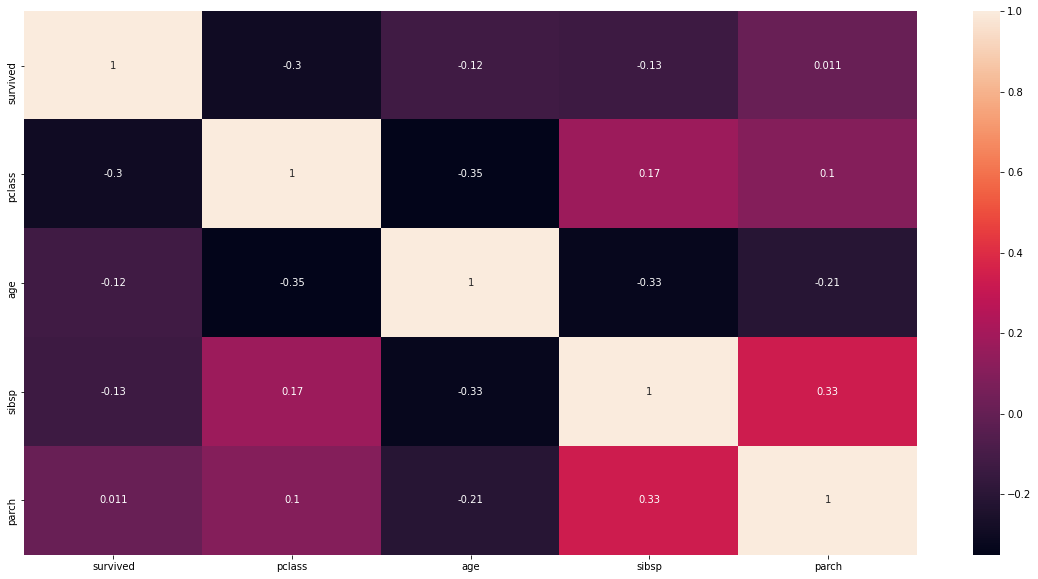

In [ ]:
#Visulize the heatmap
corr = train.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

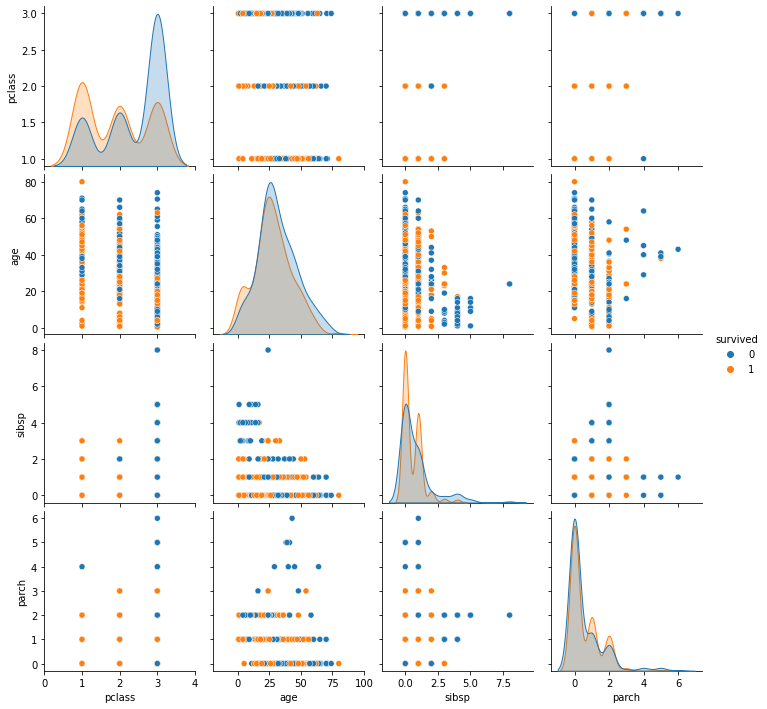

In [ ]:
#Visulize the pair plots with hue being survivers 
sns.pairplot(train, hue='survived')

# Feature Enginerring

In [ ]:
train.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
test.head()

,pclass,sex,age,sibsp,parch,embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [ ]:
#We shall create age groups for the age columns for easy encoding
data = [train, test]
for dataset in data:
    dataset['agegroup'] = dataset['age'].astype(int)
    dataset.loc[ dataset['agegroup'] <= 10, 'age'] = 0
    dataset.loc[(dataset['agegroup'] > 10) & (dataset['agegroup'] <= 20), 'agegroup'] = 1
    dataset.loc[(dataset['agegroup'] > 20) & (dataset['agegroup'] <= 30), 'agegroup'] = 2
    dataset.loc[(dataset['agegroup'] > 30) & (dataset['agegroup'] <= 40), 'agegroup'] = 3
    dataset.loc[(dataset['agegroup'] > 40) & (dataset['agegroup'] <= 50), 'agegroup'] = 4
    dataset.loc[(dataset['agegroup'] > 50) & (dataset['agegroup'] <= 60), 'agegroup'] = 5
    dataset.loc[(dataset['agegroup'] > 60),  'agegroup'] = 6
    
#We shall then drop age 
train=train.drop(['age'],axis=1)
test=test.drop(['age'],axis=1)
#confirm
train.head()

,survived,pclass,sex,sibsp,parch,embarked,agegroup
0,0,3,male,1,0,S,2
1,1,1,female,1,0,C,3
2,1,3,female,0,0,S,2
3,1,1,female,1,0,S,3
4,0,3,male,0,0,S,3


In [ ]:
test.head()

,pclass,sex,sibsp,parch,embarked,agegroup
0,3,male,0,0,Q,3
1,3,female,1,0,S,4
2,2,male,0,0,Q,6
3,3,male,0,0,S,2
4,3,female,1,1,S,2


In [ ]:
#lets label encode the data now
le=Le()
cols=['sex', 'embarked']
for i in cols:
  train[i]= le.fit_transform(train[i])
  test[i]=le.fit_transform(test[i])
train.head()

,survived,pclass,sex,sibsp,parch,embarked,agegroup
0,0,3,1,1,0,2,2
1,1,1,0,1,0,0,3
2,1,3,0,0,0,2,2
3,1,1,0,1,0,2,3
4,0,3,1,0,0,2,3


In [ ]:
test.head()

,pclass,sex,sibsp,parch,embarked,agegroup
0,3,1,0,0,1,3
1,3,0,1,0,2,4
2,2,1,0,0,1,6
3,3,1,0,0,2,2
4,3,0,1,1,2,2


# Modelling

In [ ]:
#We shall build a function to call when splitting the data.
from sklearn.neighbors import KNeighborsClassifier
sc = StandardScaler()
def model(X,y, test_frac):

  #split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac, random_state = 0)

  #scale the data
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  #create and fit model
  classifier = KNeighborsClassifier().fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  #evaluate model
  print('Training Accuracy:', accuracy_score(y_train, classifier.predict(X_train)))
  print('Test Accuracy:', accuracy_score(y_test,y_pred))
  print("F1 score", f1_score(y_test,y_pred))
  print('*******')
  print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
  print('*******')
  print('Classification Report:',classification_report(y_test, y_pred))

#optimization
  error_rate = []
  for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

  plt.figure(figsize=(10,6))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
          marker='o',markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
#defining x and y
X=train.drop('survived', axis=1)
y=train.survived

Training Accuracy: 0.7734204793028322
Test Accuracy: 0.7130434782608696
F1 score 0.6857142857142856
*******
Confusion Matrix: [[46 11]
 [22 36]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.68      0.81      0.74        57
           1       0.77      0.62      0.69        58

    accuracy                           0.71       115
   macro avg       0.72      0.71      0.71       115
weighted avg       0.72      0.71      0.71       115

Minimum error:- 0.26956521739130435 at K = 16


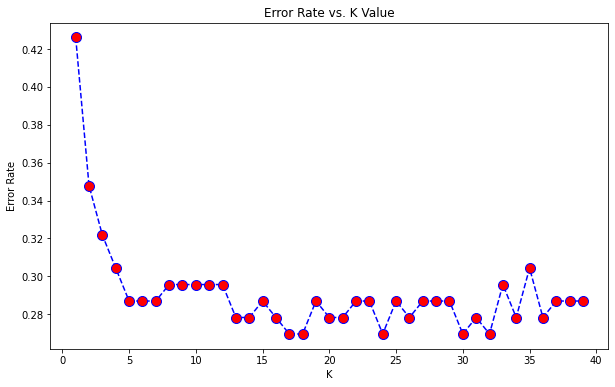

In [ ]:
#Splite the data (80,20)
model(X,y,0.2)

Training Accuracy: 0.7680798004987531
Test Accuracy: 0.7398843930635838
F1 score 0.6938775510204082
*******
Confusion Matrix: [[77 13]
 [32 51]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.86      0.77        90
           1       0.80      0.61      0.69        83

    accuracy                           0.74       173
   macro avg       0.75      0.74      0.73       173
weighted avg       0.75      0.74      0.74       173

Minimum error:- 0.26011560693641617 at K = 4


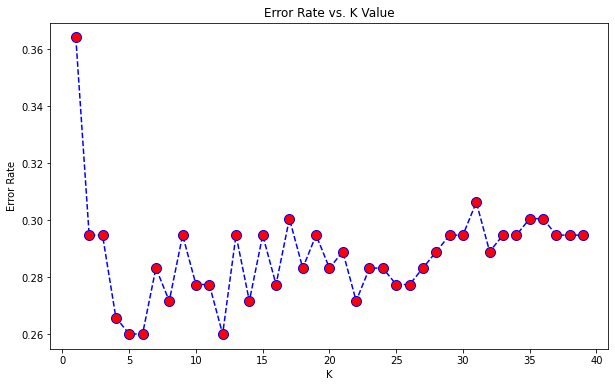

In [ ]:
#Split the data (70,30)
model(X,y,0.3)

Training Accuracy: 0.7965116279069767
Test Accuracy: 0.7086956521739131
F1 score 0.6666666666666666
*******
Confusion Matrix: [[96 28]
 [39 67]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.77      0.74       124
           1       0.71      0.63      0.67       106

    accuracy                           0.71       230
   macro avg       0.71      0.70      0.70       230
weighted avg       0.71      0.71      0.71       230

Minimum error:- 0.2565217391304348 at K = 27


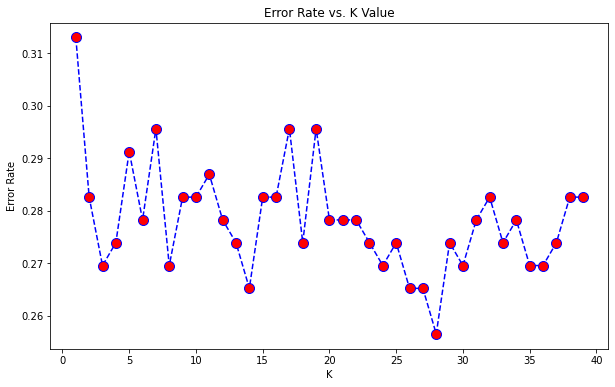

In [ ]:
#split the data (60,40)
model(X,y,0.4)

From the accurancy scorea nd f1 score produced by the model with different splits, (70,30) split produced the highest f1_score. We shall the use it to perform hyperparameteric tuning.

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn= KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 1
Best n_neighbors: 24


In [ ]:
# Split (70,30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
knn = KNeighborsClassifier(leaf_size=2,n_neighbors=24, p=1)
knn.fit(X_train, y_train)

# make predictions on our test data

y_pred = knn.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print("F1 score", f1_score(y_test,y_pred))
print('*******')
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
print('*******')
print('Classification Report:',classification_report(y_test, y_pred))

Training Accuracy: 0.7645348837209303
Test Accuracy: 0.7304347826086957
F1 score 0.6736842105263159
*******
Confusion Matrix: [[104  20]
 [ 42  64]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.84      0.77       124
           1       0.76      0.60      0.67       106

    accuracy                           0.73       230
   macro avg       0.74      0.72      0.72       230
weighted avg       0.74      0.73      0.73       230



# Challenging the solution

In [ ]:
# Reviewing the Solution by applying LDA to the features and using the most important features only in the training process
#defining x and y
X=train.drop('survived', axis=1)
y=train.survived
#Perorming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
#Normalizing our data
sc = StandardScaler()
X_train =sc.fit_transform(X)
X_test = sc.transform (X)

X_lda=lda.fit(X,y)
#Getting the coeffients
X_lda.coef_
#getting the columns names
result=pd.DataFrame(index=X.columns.values,data=X_lda.coef_[0])
result.sort_values(0,ascending=False)

,0
parch,-0.027578
embarked,-0.141386
agegroup,-0.161146
sibsp,-0.213328
pclass,-0.894660
sex,-2.444671


In [ ]:
#Taking the first 5 features
X=train[['parch','embarked','agegroup','sibsp','pclass']]
y=train.survived
# Split (70,30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
knn = KNeighborsClassifier(leaf_size=2,n_neighbors=24, p=1)
knn.fit(X_train, y_train)

# make predictions on our test data

y_pred = knn.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print("F1 score", f1_score(y_test,y_pred))
print('*******')
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
print('*******')
print('Classification Report:',classification_report(y_test, y_pred))

Training Accuracy: 0.6708229426433915
Test Accuracy: 0.630057803468208
F1 score 0.5555555555555555
*******
Confusion Matrix: [[69 21]
 [43 40]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.77      0.68        90
           1       0.66      0.48      0.56        83

    accuracy                           0.63       173
   macro avg       0.64      0.62      0.62       173
weighted avg       0.64      0.63      0.62       173



Applying LDA() makes our model perform worst that before. This means that our model is perfoming well as it is now.


**Follow Up Question**
1. Did we have the right data?
yes since the data we have has been helped us to build a model and make predictions.

2.  Do we need other data to answer our question?
Not neccessariry. However other aligorithms can be performed on the data.